In [1]:
import pandas as pd
import numpy as np

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE

## 讀取檔案

In [2]:
""" Your code hear: """
train = pd.read_csv('./train.csv')
# test = pd.read_csv('./data/test.csv')
print(train.shape)
train.head()


(1095, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1431,60,RL,60.0,21930,Pave,NaN,IR3,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,192140
1,757,60,RL,68.0,10769,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,212000
2,632,120,RL,34.0,4590,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,209500
3,1193,50,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,7,2007,WD,Normal,125000
4,773,80,RL,94.0,7819,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Abnorml,107000


## 取出連續型特徵 (方便降維)

In [3]:
""" Your code hear: """
print(train.dtypes)
#continual = train.loc[:,[f for f in train.columns if train.dtypes[f] != 'object']]
continual = train.select_dtypes(exclude = 'object')
print(continual.shape)
continual.head()

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object
(1095, 38)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1431,60,60.0,21930,5,5,2005,2005,0.0,0,...,100,40,0,0,0,0,0,7,2006,192140
1,757,60,68.0,10769,8,5,2007,2007,0.0,20,...,144,105,0,0,0,0,0,4,2009,212000
2,632,120,34.0,4590,8,5,2006,2006,108.0,24,...,156,73,0,0,0,0,0,8,2007,209500
3,1193,50,60.0,9600,5,8,1925,1994,0.0,0,...,0,0,84,0,0,0,0,7,2007,125000
4,773,80,94.0,7819,6,5,1976,1976,0.0,422,...,144,0,0,0,0,0,0,3,2010,107000


## 分析缺失值

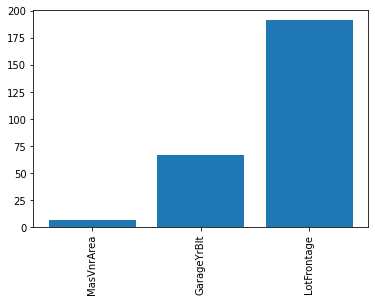

In [4]:
""" Your code hear: 練習印出缺失值圖表 """
missing = continual.isnull().sum(axis = 0)
missing = missing[missing > 0]
missing.sort_values(inplace=True)

#plt.figure(figsize = (8, 4))
plt.figure()
plt.bar(list(missing.index), np.array(missing))
plt.xticks(rotation='vertical')
plt.show()

## 去除缺失值

In [5]:
""" Your code hear: 去除缺失值 """
continualAfterDrop = continual.dropna()#.reset_index(drop = True)
print(continualAfterDrop.shape)
continualAfterDrop

(838, 38)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1431,60,60.0,21930,5,5,2005,2005,0.0,0,...,100,40,0,0,0,0,0,7,2006,192140
1,757,60,68.0,10769,8,5,2007,2007,0.0,20,...,144,105,0,0,0,0,0,4,2009,212000
2,632,120,34.0,4590,8,5,2006,2006,108.0,24,...,156,73,0,0,0,0,0,8,2007,209500
3,1193,50,60.0,9600,5,8,1925,1994,0.0,0,...,0,0,84,0,0,0,0,7,2007,125000
4,773,80,94.0,7819,6,5,1976,1976,0.0,422,...,144,0,0,0,0,0,0,3,2010,107000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1361,70,51.0,9842,5,6,1921,1998,0.0,0,...,183,0,301,0,0,0,0,5,2008,189000
1091,9,50,51.0,6120,7,5,1931,1950,0.0,0,...,90,0,205,0,0,0,0,4,2008,129900
1092,382,20,60.0,7200,7,5,2006,2006,0.0,0,...,216,121,0,0,0,0,0,8,2006,187750
1093,1414,20,88.0,10994,8,5,2005,2006,366.0,976,...,165,44,0,0,0,0,0,9,2009,257000


## 轉化成 ndarray 後進行標準化，並將 Y 透過四分位數轉換成四個類別

In [6]:
""" Your code hear: """
Y = continualAfterDrop['SalePrice']
arr = np.array(continualAfterDrop, dtype = 'float')
X = (arr - np.mean(arr, axis = 0)) / np.std(arr, axis = 0)
Y_labels = pd.qcut(Y, 4, labels = [0,1,2,3])
Y_labels

0       2
1       2
2       2
3       0
4       0
       ..
1090    2
1091    0
1092    2
1093    3
1094    0
Name: SalePrice, Length: 838, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

## 利用 TSNE 降維

In [7]:
tsne = TSNE(
    n_components=2, init='pca', perplexity = 40, 
    early_exaggeration = 8, learning_rate = 150,
    n_iter = 2000
)
X_tsne = tsne.fit_transform(X)
X_tsne

array([[  7.7306356,  12.196214 ],
       [ 13.023205 ,  14.636463 ],
       [ 16.394415 , -13.009051 ],
       ...,
       [ 19.086231 , -13.356004 ],
       [ 20.589518 ,  -1.9089454],
       [-13.7735195,   4.407349 ]], dtype=float32)

## 做圖

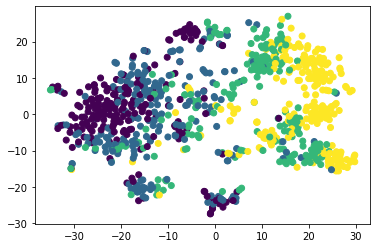

In [9]:
""" Your code hear: """
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=Y_labels)

## 1. 請問同學從降維後的圖表中可以看出什麼現象？

## 2. 請同學分析，什麼因素導致降維後的點座標重合性高？